<a href="https://colab.research.google.com/github/nxxhhaaa/sql-final-project-data/blob/main/Project_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employment Trends in India

A data-driven exploratory analysis of employment data in India using the messy dataset from Kaggle.

### Project Overview

This project performs an in-depth exploratory data analysis (EDA) to uncover patterns in employment, salary, education, industry trends, and risk levels.

### Objectives

- Understand employment distribution across states and industries
- Investigate salary patterns and their relationship with experience and education
- Analyze AI Risk levels and their impact on earnings
- Provide actionable insights for policymakers and researchers

### Domain
The dataset falls under the employment and labour statistics domain.

### Dataset
The dataset contains approximately 2000 rows and 10 columns with Status,	Age Group,	Education,	Industry, Location,	AI Risk,	Years of Experience,	Monthly Salary (INR),	Date Recorded representing employment-related information in India.

## 1. Importing Libraries
We begin by importing the essential Python libraries required for data loading, cleaning, and analysis by uploading the file in github and then pasting the url.The dataset is loaded directly from the URL using `pd.read_csv()`.  

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/nxxhhaaa/sql-final-project-data/main/Messy_Employment_India_Dataset.csv"
df = pd.read_csv(url)

## Initial Overview of the Dataset
We check:
- Number of rows and columns  
- Column names  
- Data types  
- Basic statistical summary  

In [ ]:
rows,columns=df.shape
print('rows:',rows)
print('columns:',columns)

rows: 2000
columns: 9


In [ ]:
# Types of Data
df.dtypes

,0
Status,object
Age Group,object
Education,object
Industry,object
Location,object
AI Risk,object
Years of Experience,float64
Monthly Salary (INR),float64
Date Recorded,object


The dataset contains 2000 rows and 9 columns with  an object data type

In [ ]:
# Display first few rows
df.head()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023


In [ ]:
# Display last few rows
df.tail()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
1995,employed,25-34,Ph.D,Finance,Hyderabad,Low,NaN,113000.0,6/18/2028
1996,EMPLOYED,25-34,PhD,Tech,NaN,NaN,22.0,102200.0,6/19/2028
1997,NaN,35 - 44,Masters,Education,NaN,low,NaN,31600.0,6/20/2028
1998,EMPLOYED,25_34,high school,Retail,Mumbai,HIGH,22.0,92500.0,6/21/2028
1999,UNEMPLOYED,25_34,High School,NaN,NaN,moderate,NaN,43300.0,6/22/2028


In [ ]:
## Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                1732 non-null   object 
 1   Age Group             1768 non-null   object 
 2   Education             1804 non-null   object 
 3   Industry              1799 non-null   object 
 4   Location              1787 non-null   object 
 5   AI Risk               1716 non-null   object 
 6   Years of Experience   980 non-null    float64
 7   Monthly Salary (INR)  1613 non-null   float64
 8   Date Recorded         2000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 140.8+ KB


The dataset contains 2000 entries of 9 columns with 2 float type columns that is years of experience and monthly salary while others are object data types.

In [ ]:
# Statistical Summary
df.describe()

,Years of Experience,Monthly Salary (INR)
count,980.000000,1613.000000
mean,15.244898,76886.360818
std,9.103941,41628.008054
min,0.000000,5100.000000
25%,7.000000,40700.000000
50%,16.000000,77200.000000
75%,23.000000,112400.000000
max,30.000000,149900.000000


In [ ]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

### Checking for Missing Values
We check how many missing (NaN) values exist in each column.  
This helps decide whether to remove rows, fill them, or leave them untouched.

In [ ]:
df.isnull().sum()

,0
Status,268
Age Group,232
Education,196
Industry,201
Location,213
AI Risk,284
Years of Experience,1020
Monthly Salary (INR),387
Date Recorded,0


The code above shows the total number of nulls in each columns in which there is no null values in date recorded.

### Checking for Duplicates
Duplicate records can affect analysis and model accuracy.  
We check for duplicates and remove them if necessary.


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
df.drop_duplicates()

Number of duplicate rows: 0


,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,2023-01-01
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,2023-01-02
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,2023-01-03
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,2023-01-04
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,2023-01-05
...,...,...,...,...,...,...,...,...,...
1995,employed,25-34,Ph.D,Finance,Hyderabad,Low,NaN,113000.0,2028-06-18
1996,EMPLOYED,25-34,PhD,Tech,NaN,NaN,22.0,102200.0,2028-06-19
1997,NaN,35 - 44,Masters,Education,NaN,low,NaN,31600.0,2028-06-20
1998,EMPLOYED,25_34,high school,Retail,Mumbai,HIGH,22.0,92500.0,2028-06-21


The dataset does not contain any duplicate values

### Handling Missing Values
Based on the dataset, different strategies are used:
- Numerical columns filled with mean
- Categorical columns filled with mode  
- Rows with too many missing values are removed  

In [ ]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


#Detecting Mistakes in Data Columns

To ensure the data is clean and consistent, we check each categorical column for spelling errors, inconsistent capitalization, extra spaces, and rare incorrect values.

In [ ]:
df['Status'] = df['Status'].str.lower()
df['Status'].unique()
df['Education'] = df['Education'].str.lower()
df['Education'] = df['Education'].replace({
    'master': 'masters',
    "bachelor's": 'bachelors',
    'ph.d': 'phd'
})
df['Education'].unique()
df['AI Risk']=df['AI Risk'].str.lower()
df['AI Risk'].unique()
df['Location']=df['Location'].str.lower()
df['Location'].unique()
df['Age Group']=df['Age Group'].replace({
    "18 to 24" : "18-24",
    "25_34" : "25-34",
})
df['Age Group'].unique()

array(['25-34', '18-24', '45-54', '35 - 44', '55+'], dtype=object)

#Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps understand the structure, distribution, and relationships within the dataset.  
This section includes:

- **Univariate analysis**
- **Bivariate analysis**
- **Multivariate analysis**
- **Groupby operations**
- **Pivot tables**
- **Correlation analysis**

The goal is to identify patterns, trends, and insights that support decision-making and further modeling.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate Analysis

You analyze one column at a time (uni = one). The purpose is to understand how each column behaves individually.

Text(0, 0.5, 'Frequency')

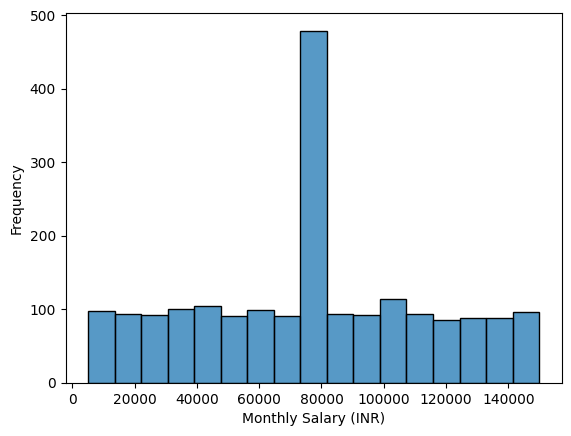

In [ ]:
sns.histplot(df['Monthly Salary (INR)'])
plt.ylabel('Frequency')

The distribution of monthly salary is ploted to understand the salary trend in the dataset

Text(0, 0.5, 'Monthly Salary (INR)')

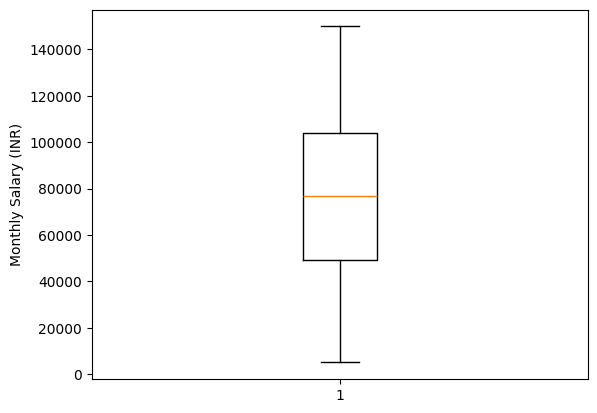

In [ ]:
plt.boxplot(df['Monthly Salary (INR)'])
plt.ylabel('Monthly Salary (INR)')

#Boxplot of Monthly Salary (INR)

The boxplot visualizes the distribution of Monthly Salary (INR) in the dataset.This plot is useful for detecting salary variability and extreme income values in the dataset, which may indicate data anomalies or highly paid roles.

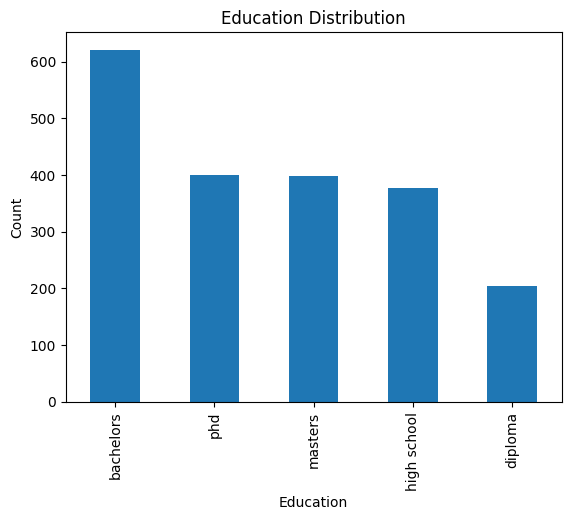

In [ ]:
df['Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

This bar chart displays the frequency of each education category in the dataset.
Using value_counts(), we count how many individuals belong to each education level.

#Bivariate Analysis

You study the relationship between two columns (bi = two).The purpose is to check if one variable affects or relates to another.

<function matplotlib.pyplot.show(close=None, block=None)>

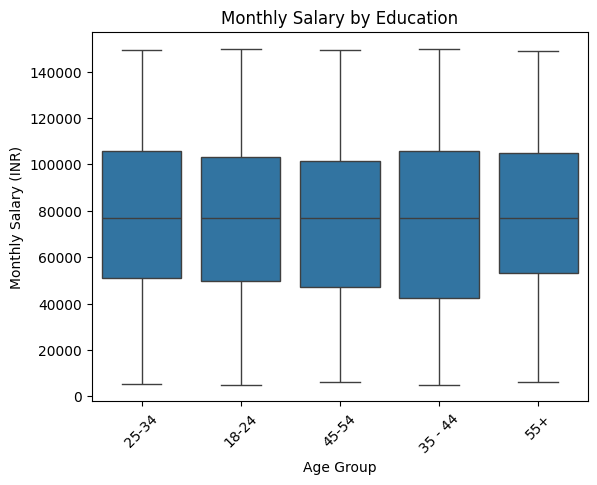

In [ ]:
sns.boxplot(x='Age Group',y='Monthly Salary (INR)',data=df)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Monthly Salary (INR)')
plt.title('Monthly Salary by Education')
plt.show

The boxplot visualizes how Monthly Salary (INR) varies across different Education categories.By rotating the x-axis labels to 45°,the category names are easier to read.This visualization helps identify whether higher education levels correspond to higher salary ranges.

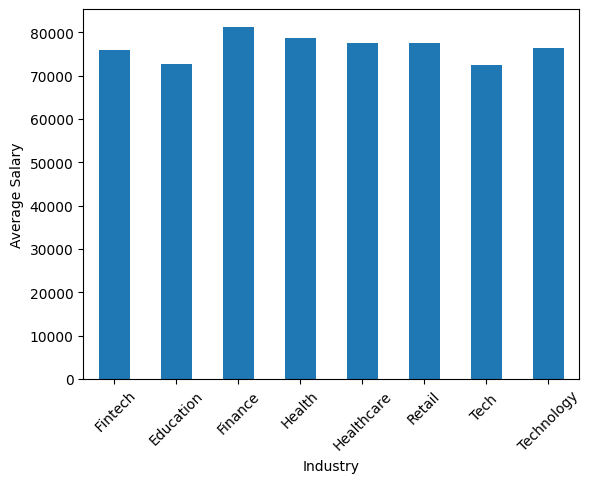

In [ ]:
df.groupby('Industry')['Monthly Salary (INR)'].mean().plot(kind='bar')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the average Monthly Salary (INR) across different industry sectors.The data is first grouped by Industry, and the mean salary is calculated for each group.Rotating the x-axis labels by 45 degrees improves readability when industry names are long.Overall, this plot provides a clear aggregated comparison of salary trends across industries.

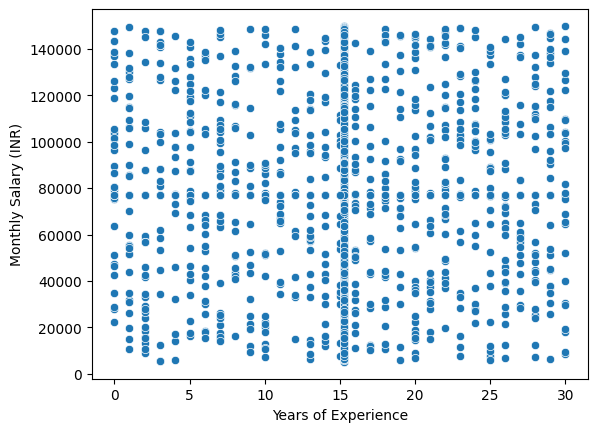

In [ ]:
sns.scatterplot(x='Years of Experience', y='Monthly Salary (INR)', data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Salary (INR)')
plt.show()

The scatter plot illustrates the relationship between Years of Experience and Monthly Salary (INR).Each point represents an individual data record.A positive trend in the plot suggests that higher experience is generally associated with higher monthly salary, while scattered points indicate variability within the data.

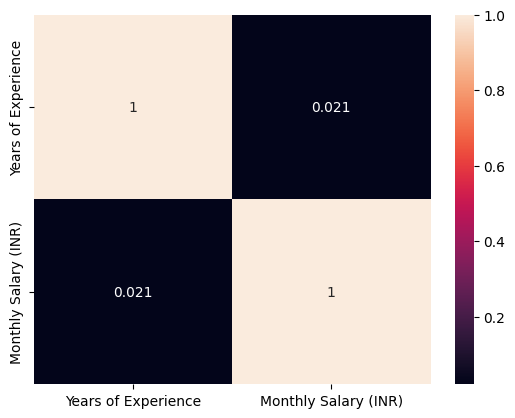

In [ ]:
sns.heatmap(df[['Years of Experience', 'Monthly Salary (INR)']].corr(),annot=True)
plt.show()



Correlation is used in bivariate analysis to measure the strength and direction of the linear relationship between two numerical variables.The correlation coefficient ranges from -1 to +1:

Positive value → As years of experience increase, monthly salary tends to increase

Negative value → As one variable increases, the other tends to decrease

Value near 0 → Little or no linear relationship

#Multivariate Analysis

You analyze more than two columns at the same time (multi = many). The purpose is to understand complex patterns.

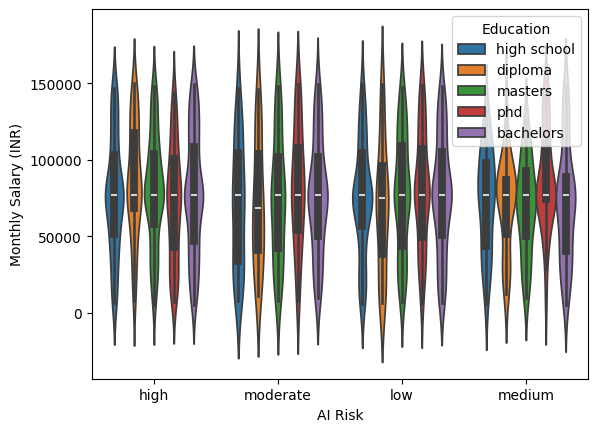

In [ ]:
sns.violinplot(x='AI Risk',y='Monthly Salary (INR)',hue='Education',data=df)
plt.figsize=(10,6)
plt.xlabel('AI Risk')
plt.ylabel('Monthly Salary (INR)')
plt.show()

This violin plot visualizes the distribution of Monthly Salary (INR) across different AI Risk levels, with separate distributions for each Education category.By combining AI risk and education, this visualization provides a multivariate view of how technological risk and educational background influence income patterns.

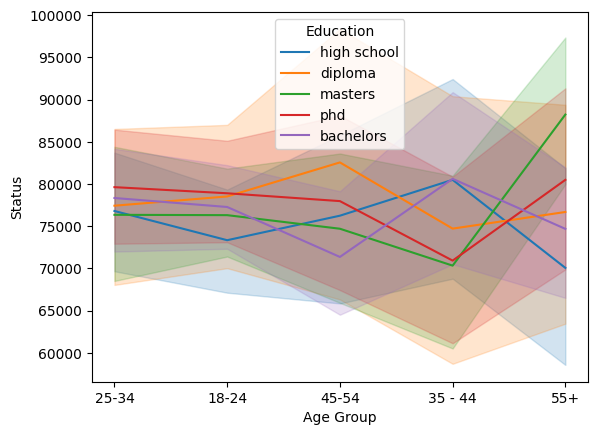

In [ ]:
sns.lineplot(x=df['Age Group'],y=df['Monthly Salary (INR)'],hue=df['Education'])
plt.ylabel('Status')
plt.xlabel('Age Group')
plt.show()

This line plot illustrates how Status varies across different Age Groups, with separate lines representing different Education levels.Using education as a distinguishing factor allows a multivariate comparison across age group, status, and education.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.3% of the points cannot be plac

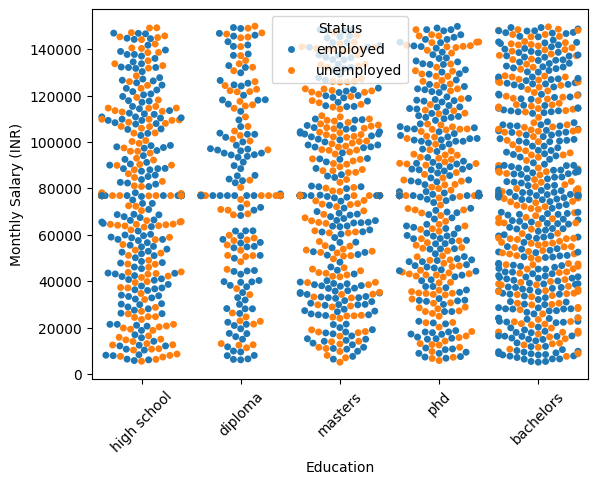

In [ ]:
sns.swarmplot(
    x='Education',
    y='Monthly Salary (INR)',
    hue='Status',
    data=df
)
plt.xticks(rotation=45)
plt.show()


The swarm plot arranges data points to avoid overlap, providing a clearer
view of salary distributions and density patterns across categories.

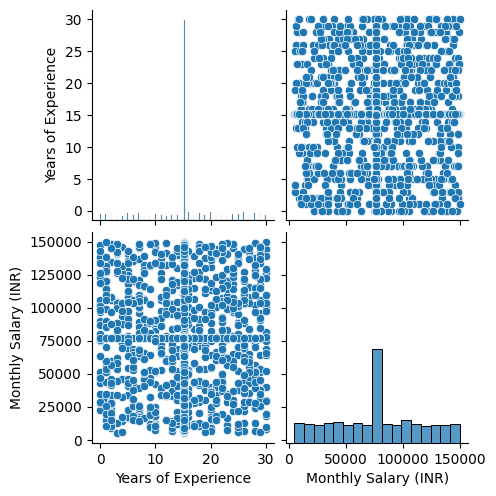

In [ ]:
sns.pairplot(df[['Years of Experience', 'Monthly Salary (INR)', 'AI Risk']])
plt.show()

The pair plot visualizes pairwise relationships between multiple numerical variables in the dataset.The pair plot is useful for identifying linear relationships, clusters, and outliers across multiple variables simultaneously, making it an effective tool for multivariate exploratory data analysis.